In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import ast

%matplotlib inline

In [2]:
df = pd.read_csv('assets/glassdoor_22april2018.csv')
print(len(df))
df.head(2)

606


,title,dateposted,validthrough,industry,orgname,cat,descr,stars,jobid,minsal,maxsal,medsal,empid,jobtitleid,jobreqid,url
0,Data Scientist,2018-04-16,2018-05-22,Information Technology,Integral Ad Science,"['15-1111.00', 'Computer and Information Resea...",We are seeking a Data Scientist to join our te...,3.7,2735259369,120000,174000,145000,782797,119899,3203739089,http://www.glassdoor.com/partner/jobListing.ht...
1,Data Scientist,2018-04-19,2018-05-22,Travel & Tourism,HotelTonight,"['15-1111.00', 'Computer and Information Resea...",HotelTonight makes it remarkably easy to book...,4.6,2699359507,111000,163000,135000,639341,119899,3168666373,http://www.glassdoor.com/partner/jobListing.ht...


In [3]:
## https://wiki.python.org/moin/EscapingHtml

def unescape(s):
    s = s.replace('&amp;', '&')
    s = s.replace('&lt;', '<')
    s = s.replace('&gt;', '>')
    s = s.replace('&amp;', '&')
    s = s.replace('&#039;', '\'')
    return s

### title

In [4]:
df['title'] = [unescape(x) for x in df['title']]
df['title'].value_counts()[df['title'].value_counts() > 2]

Data Scientist                          42
Data Engineer                           36
Data Analyst                            20
Senior Data Engineer                    10
Senior Data Analyst                      9
Quantitative Analyst                     8
Business Intelligence Analyst            7
Machine Learning Engineer                6
Lead Data Scientist                      4
Research Scientist                       4
Sr. Data Analyst                         3
Lead Data Engineer - Product             3
Director, Data Engineering               3
Senior Business Intelligence Analyst     3
Financial Data Analyst                   3
Quantitative Research Analyst            3
Data Modeler                             3
Name: title, dtype: int64

### industry

In [5]:
df.loc[df['industry'].isnull(), 'orgname'].value_counts()

Oath                      6
IBM                       5
Accenture                 2
Doyensys Inc              1
CLIECON SOLUTIONS         1
Enterprise Engineering    1
M Science                 1
Name: orgname, dtype: int64

In [6]:
df.loc[df['industry'].isnull(), 'industry'] = [' '.join([x, '(industry not given)']) for x in df.loc[df['industry'].isnull(), 'orgname']]

In [7]:
df['industry'] = [unescape(x) for x in df['industry']]
df['industry'].value_counts()

Finance                                        153
Information Technology                         118
Business Services                              102
Media                                           53
Health Care                                     41
Insurance                                       41
Accounting & Legal                              15
Retail                                          13
Education                                       12
Real Estate                                      8
Manufacturing                                    7
Oath (industry not given)                        6
Consumer Services                                5
Non-Profit                                       5
IBM (industry not given)                         5
Government                                       3
Biotech & Pharmaceuticals                        3
Construction, Repair & Maintenance               3
Telecommunications                               2
Travel & Tourism               

### organization name & employer ID

In [8]:
df['orgname'] = [unescape(x) for x in df['orgname']]

In [9]:
empIDs = list(df['empid'].value_counts()[df['empid'].value_counts() > 1].index)

orgname_dict = {}
for id_ in empIDs:
    listy = df.loc[df['empid'] == id_, 'orgname'].value_counts()
    firstname = list(df.loc[df['empid'] == id_, 'orgname'].value_counts().index)[0]
    orgname_dict.update({id_ : firstname})
#     if len(listy) > 1:
#         print(id_, '\n', list(listy.index), '\n')
df['orgname'] = [orgname_dict[df.loc[i, 'empid']] if df.loc[i, 'empid'] in list(orgname_dict.keys()) else df.loc[i, 'orgname'] for i in list(df.index)]

In [10]:
df['orgname'].value_counts()[df['orgname'].value_counts() > 2]

J.P. Morgan                        41
Open Systems Technologies (NYC)    31
CitiGroup                          11
New York Life                      11
Citibank                           10
Mount Sinai Health System           9
Aetna Inc.                          9
Goldman Sachs                       8
Mount Sinai Medical Center          8
NYU Langone Medical Center          8
KPMG International                  8
Capital One                         8
Columbia University                 8
Memorial Sloan-Kettering            7
Oath                                6
Two Sigma                           6
IBM                                 5
Moody's Analytics                   5
Point72                             4
Spotify                             4
Gartner                             4
Bloomberg                           4
AIG                                 4
Rockstar Games                      4
Zillow                              4
Chase                               4
Verizon     

### description

In [11]:
df['descr'] = [BeautifulSoup(unescape(x.encode().decode('utf-8')), 'lxml').get_text(' ') for x in df['descr']]
df['descr'] = [x.replace(' n ', '').replace(' xa0 ', '').replace('.n ', '. ').replace(' xa0n ', ' ') for x in df['descr']]
df['descr'].head()

0    We are seeking a Data Scientist to join our te...
1    HotelTonight makes it remarkably easy to book ...
2    Medidata's unified platform, pioneering analyt...
3    Job Description The New York Times is committe...
4    A data scientist at Kensho is passionate about...
Name: descr, dtype: object

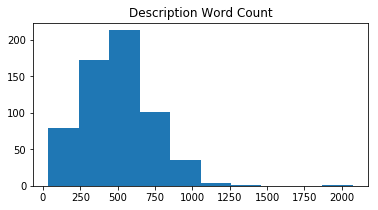

In [12]:
plt.figure(figsize = (6, 3))
df['descr'].apply(lambda x: len(x.split(' '))).hist()
plt.title('Description Word Count')
plt.grid(False)
plt.show();

### stars

In [13]:
df.loc[df['stars'].isnull(), 'orgname'].value_counts()

Kensho                     2
CLIECON SOLUTIONS          1
Eagle Network Solutions    1
CORPORATE                  1
Name: orgname, dtype: int64

In [14]:
df = df[pd.notnull(df['stars'])]

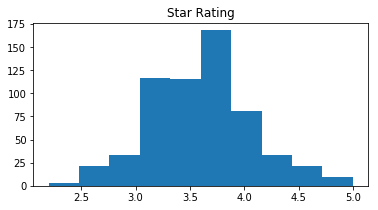

In [15]:
plt.figure(figsize = (6, 3))
df['stars'].hist()
plt.title('Star Rating')
plt.grid(False)
plt.show();

### job ID

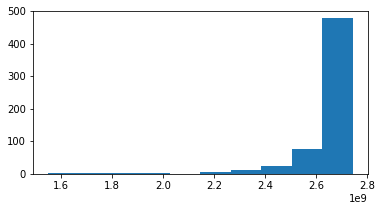

In [16]:
plt.figure(figsize = (6, 3))
df['jobid'].hist()
plt.grid(False)
plt.show();

### jobtitleid

In [17]:
df['jobtitleid'].value_counts().head()

-1         303
 119899     42
 46157      37
 46094      20
 160524     11
Name: jobtitleid, dtype: int64

In [18]:
jobtitleid_dict = {}
for jobtitleid in list(df['jobtitleid'].value_counts().index):
    if jobtitleid == -1:
        pass
    else:
        x = df.loc[df['jobtitleid'] == jobtitleid, 'title'].value_counts()
        jobtitleid_dict.update({jobtitleid : (x.index)[0]})
#         if x.sum() > 1:
#             print(str(jobtitleid) + '    ', '\t', x.sum(), '\t', list(x.index))
df['title'] = [jobtitleid_dict[df.loc[i, 'jobtitleid']] if df.loc[i, 'jobtitleid'] in list(jobtitleid_dict.keys()) else df.loc[i, 'title'] for i in list(df.index)]

### salary

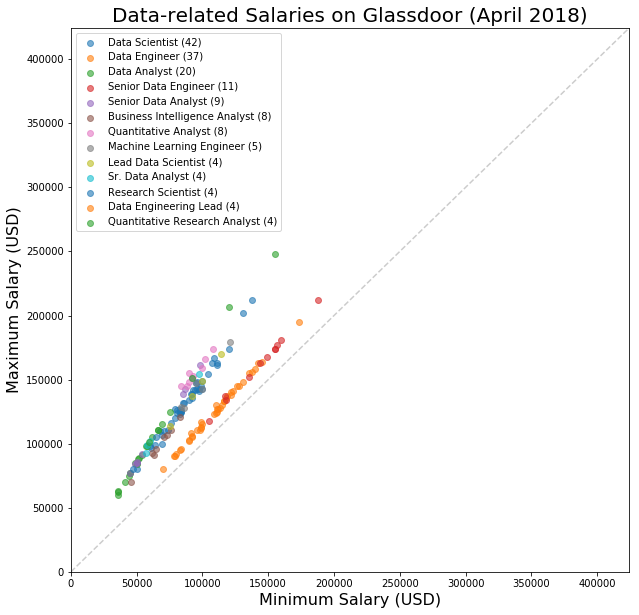

In [19]:
plt.figure(figsize = (10, 10))

for jobtitleid in list(df['jobtitleid'].value_counts().index):
    lil_df = df.loc[df['jobtitleid'] == jobtitleid, ['minsal', 'maxsal']]
    if jobtitleid == -1:
        pass
    elif len(lil_df) > 3:
        plt.scatter(lil_df['minsal'], lil_df['maxsal'], label = ' '.join([jobtitleid_dict[jobtitleid], '({})'.format(len(lil_df))]), alpha = 0.6)
plt.title('Data-related Salaries on Glassdoor (April 2018)', fontsize = 20)
plt.xlabel('Minimum Salary (USD)', fontsize = 16)
plt.ylabel('Maximum Salary (USD)', fontsize = 16)
plt.xlim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.ylim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.plot([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], [0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], ls = '--', color = 'gray', alpha = 0.4)
plt.legend(loc = 'best', fontsize = 10)
plt.show();

### category

In [20]:
df['cat'].value_counts()

['15-1111.00', 'Computer and Information Research Scientists']                                                    139
['13-1111.00', 'Management Analysts']                                                                             125
['15-1132.00', 'Software Developers, Applications']                                                               124
['13-1161.00', 'Market Research Analysts and Marketing Specialists']                                               42
['13-2099.01', 'Financial Quantitative Analysts']                                                                  38
['11-2021.00', 'Marketing Managers']                                                                               35
['19-1042.00', 'Medical Scientists, Except Epidemiologists']                                                       21
['15-1199.08', 'Business Intelligence Analysts']                                                                   19
['15-1199.06', 'Database Architects']                   

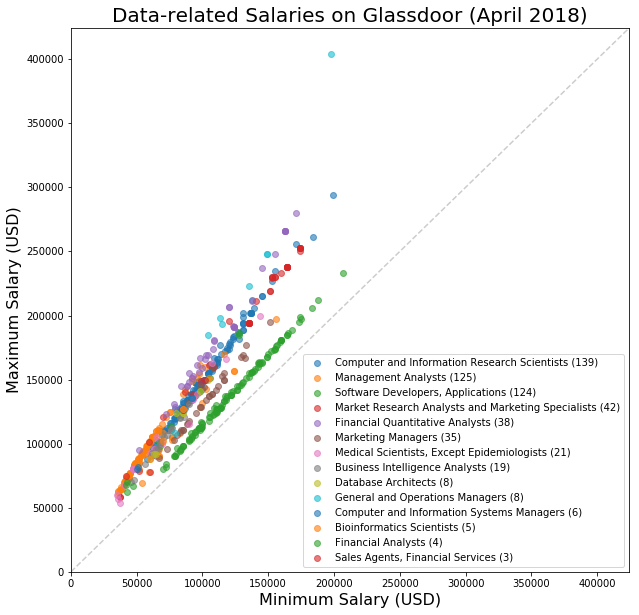

In [21]:
plt.figure(figsize = (10, 10))

for cat in list(df['cat'].value_counts().index):
    lil_label = ast.literal_eval(cat)[1]
    lil_df = df.loc[df['cat'] == cat, ['minsal', 'maxsal']]
    if len(lil_df) > 2:
        plt.scatter(lil_df['minsal'], lil_df['maxsal'], label = '{} ({})'.format(lil_label, len(lil_df)), alpha = 0.6)

plt.title('Data-related Salaries on Glassdoor (April 2018)', fontsize = 20)
plt.legend(loc = 'best', fontsize = 10)
plt.xlim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.ylim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.plot([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], [0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], ls = '--', color = 'gray', alpha = 0.4)
plt.xlabel('Minimum Salary (USD)', fontsize = 16)
plt.ylabel('Maximum Salary (USD)', fontsize = 16)
plt.show();

In [22]:
df.to_csv('assets/glassdoor_clean.csv', index = False)